# main

In [4]:
!python main.py

100%|████████████████████████████████████| 60548/60548 [06:06<00:00, 165.33it/s]


# create characters

In [7]:
!python get_character.py

100%|█████████████████████████████| 1179479/1179479 [00:04<00:00, 262560.26it/s]


# Appendix

In [8]:
import numpy as np
from pathlib import Path
import lmdb
import six
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import japanize_matplotlib
import json
import cv2

In [31]:
text_lengths = []

In [32]:
ROOT_DIR = Path.cwd().parents[2]
EXP_NAME = Path.cwd().stem
LMDB_DIR = ROOT_DIR / 'data' / EXP_NAME / 'lmdb'

env = lmdb.open(str(LMDB_DIR), max_readers=32, readonly=True, lock=False, readahead=False, meminit=False)

with env.begin(write=False) as txn:
    n_samples = int(txn.get('num-samples'.encode()))
    for i in tqdm(range(n_samples), total=n_samples):
        i += 1
        
        # image
        # img_key = f'image-{str(i).zfill(8)}'.encode()
        # imgbuf = txn.get(img_key)
        # buf = six.BytesIO()
        # buf.write(imgbuf)
        # buf.seek(0)
        # img = Image.open(buf).convert('RGB')

        # json
        label_key = f'label-{str(i).zfill(8)}'.encode()
        label = txn.get(label_key).decode('utf-8')
        json_dict = json.loads(label)
        text_lengths.append(len(json_dict['text']))
        # if len(json_dict['text']) == 179:
        #     img_key = f'image-{str(i).zfill(8)}'.encode()
        #     imgbuf = txn.get(img_key)
        #     buf = six.BytesIO()
        #     buf.write(imgbuf)
        #     buf.seek(0)
        #     img = Image.open(buf).convert('RGB')
        #     break

100%|██████████| 1179479/1179479 [00:04<00:00, 267767.91it/s]


In [26]:
img

In [27]:
json_dict

{'id': '0b507ccf1a99',
 'text': 'Benefit-sharing bonus (for increased productivity and thus increased revenue of the company, the distribution is between the company and employees according to different measures)',
 'polygon': {'x0': 0,
  'x1': 248,
  'x2': 248,
  'x3': 0,
  'y0': 168,
  'y1': 168,
  'y2': 196,
  'y3': 196},
 'img-size': {'height': 28, 'width': 248},
 'role': 'tick_label'}

In [45]:
c = 0
for l in text_lengths:
    if l > 25:
        c += 1

In [46]:
c

1921

(array([9.38078e+05, 1.97785e+05, 2.92770e+04, 1.13690e+04, 2.49000e+03,
        3.06000e+02, 1.14000e+02, 2.80000e+01, 1.30000e+01, 4.00000e+00,
        6.00000e+00, 1.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  1.        ,   6.93333333,  12.86666667,  18.8       ,
         24.73333333,  30.66666667,  36.6       ,  42.53333333,
         48.46666667,  54.4       ,  60.33333333,  66.26666667,
         72.2       ,  78.13333333,  84.06666667,  90.        ,
         95.93333333, 101.86666667, 107.8       , 113.73333333,
        119.66666667, 125.6       , 131.53333333, 137.46666667,
        143.4       , 149.33333333, 155.26666667, 161.2       ,
        167.13333333, 173.06666667, 179.        ]),
 <BarContainer object of 30 artists>)

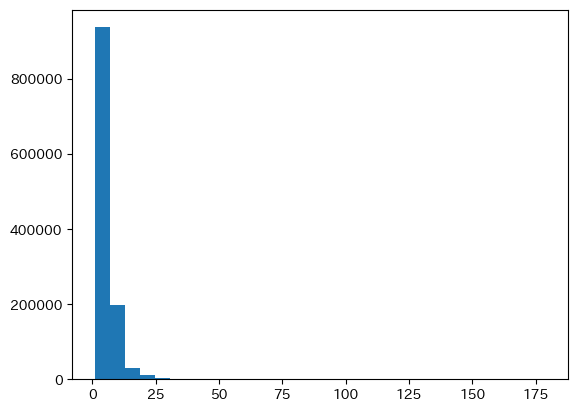

In [22]:
plt.hist(text_lengths > 100, bins=30)